# Classification and Regression

There are two major types of supervised machine learning problems, called classification
and regression.

In classification, the goal is to predict a class label, which is a choice from a predefined
list of possibilities. Previously, we used the example of classifying irises into one of
three possible species. Classification is sometimes separated into binary classification,
which is the special case of distinguishing between exactly two classes, and multiclass
classification, which is classification between more than two classes. You can think of
binary classification as trying to answer a yes/no question. Classifying emails as
either spam or not spam is an example of a binary classification problem. In this
binary classification task, the yes/no question being asked would be “Is this email
spam?”

<b> In binary classification we often speak of one class being the positive
class and the other class being the negative class. Here, positive
doesn’t represent having benefit or value, but rather what the object
of the study is. So, when looking for spam, “positive” could mean
the spam class. Which of the two classes is called positive is often a
subjective matter, and specific to the domain.

The iris example, on the other hand, is an example of a multiclass classification problem.
Another example is predicting what language a website is in from the text on the
website. The classes here would be a pre-defined list of possible languages.

For regression tasks, the goal is to predict a continuous number, or a floating-point
number in programming terms (or real number in mathematical terms). Predicting a
person’s annual income from their education, their age, and where they live is an
example of a regression task. When predicting income, the predicted value is an
amount, and can be any number in a given range. Another example of a regression
task is predicting the yield of a corn farm given attributes such as previous yields,
weather, and number of employees working on the farm. The yield again can be an
arbitrary number.

An easy way to distinguish between classification and regression tasks is to ask
whether there is some kind of continuity in the output. If there is continuity between
possible outcomes, then the problem is a regression problem. Think about predicting
annual income. There is a clear continuity in the output. Whether a person makes
$40,000 or $40,001 a year does not make a tangible difference, even though these are
different amounts of money; if our algorithm predicts $39,999 or $40,001 when it
should have predicted $40,000, we don’t mind that much.

By contrast, for the task of recognizing the language of a website (which is a classification
problem), there is no matter of degree. A website is in one language, or it is in
another. There is no continuity between languages, and there is no language that is
between English and French.

# Generalization, Overfitting, and Underfitting

In supervised learning, we want to build a model on the training data and then be
able to make accurate predictions on new, unseen data that has the same characteristics
as the training set that we used. If a model is able to make accurate predictions on
unseen data, we say it is able to generalize from the training set to the test set. We
want to build a model that is able to generalize as accurately as possible.

Usually we build a model in such a way that it can make accurate predictions on the
training set. If the training and test sets have enough in common, we expect the
model to also be accurate on the test set. However, there are some cases where this
can go wrong. For example, if we allow ourselves to build very complex models, we
can always be as accurate as we like on the training set.
Let’s take a look at a made-up example to illustrate this p

# Relation of Model Complexity to Dataset Size

It’s important to note that model complexity is intimately tied to the variation of
inputs contained in your training dataset: the larger variety of data points your dataset
contains, the more complex a model you can use without overfitting. Usually, collecting
more data points will yield more variety, so larger datasets allow building
more complex models. However, simply duplicating the same data points or collecting
very similar data will not help.

Having more data and building appropriately more complex models can often work
wonders for supervised learning tasks. In this book, we will focus on working with
datasets of fixed sizes. In the real world, you often have the ability to decide how
much data to collect, which might be more beneficial than tweaking and tuning your
model. Never underestimate the power of more data.

# Supervised Machine Learning Algorithmns

## Some sample datasets

In [3]:
!pip install mglearn

In [4]:
import matplotlib.pyplot as plt
import mglearn

X.shape: (26, 2)


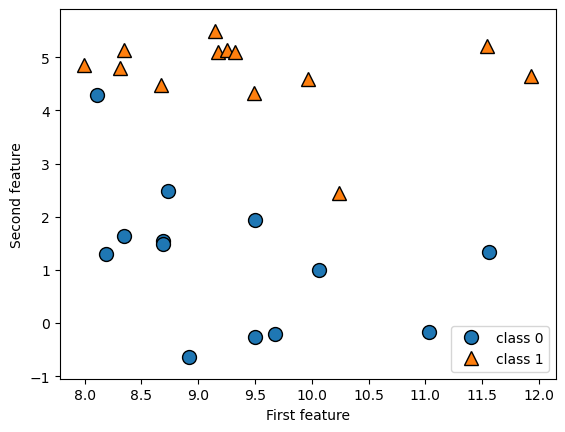

In [5]:
# generate dataset
X, y = mglearn.datasets.make_forge()

# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["class 0", "class 1"], loc = 4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print(f"X.shape: {X.shape}")

Text(0, 0.5, 'Target')

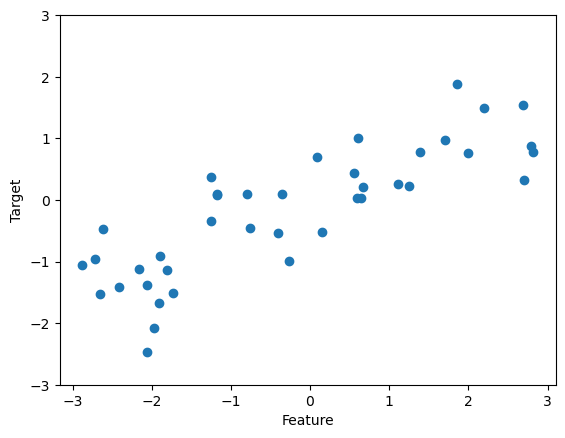

In [6]:
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(f"cancer.Key(): \n{cancer.keys()}")

cancer.Key(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


<h6> Datasets that are included in scikit-learn are usually stored as
Bunch objects, which contain some information about the dataset
as well as the actual data. All you need to know about Bunch objects
is that they behave like dictionaries, with the added benefit that you
can access values using a dot (as in bunch.key instead of
bunch['key']).

In [8]:
print(f"shape of cancer data: {cancer.data.shape}")

shape of cancer data: (569, 30)


In [9]:
import numpy as np
print(f"Sample counts per class: \n{dict((n, v) for n, v in zip(cancer.target_names, np.bincount(cancer.target)))}")

Sample counts per class: 
{'malignant': 212, 'benign': 357}


In [10]:
print(f"Feature names: \n{cancer.feature_names}")

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [11]:
from sklearn.datasets import fetch_california_housing
boston = fetch_california_housing()
print(f"Data shape: {boston.data.shape}")

Data shape: (20640, 8)


In [12]:
X,y = mglearn.datasets.load_extended_boston()
print(F"x.shape {X.shape}")

x.shape (506, 104)


## <B>k-Nearest Neigbors

### K-Neighbors classification

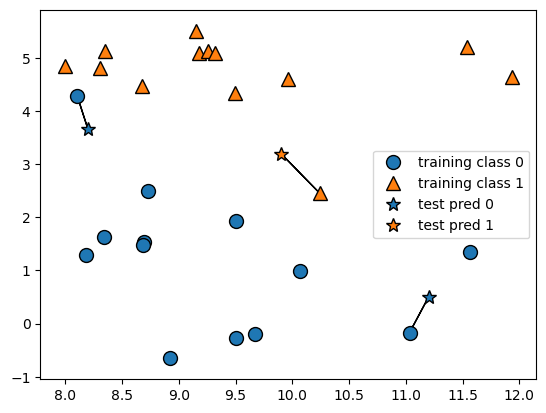

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

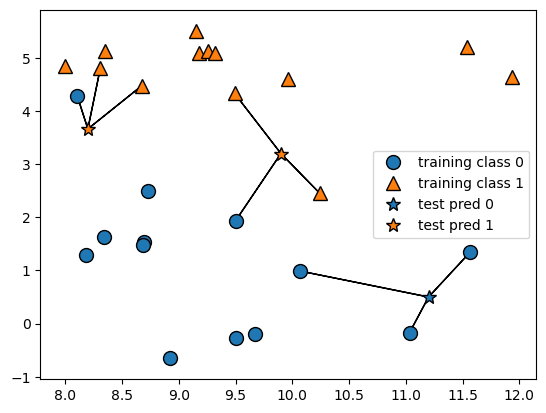

In [14]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

While this illustration is for binarhy classification problem, this mthod can be applied to datasets with any number of classes. Flr more classes, we count how many neighbors belong to each class and agian predictthe most common class.

Now ltes's look at how we can apply the k-nearest neighbors algorithm using sklearn. First, we split our data into a training and a test set so we can evaluate generalization performance. as discussed earlier:


In [15]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [17]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
print(f"Test set predictions: {clf.predict(X_test)}")

Test set predictions: [1 0 1 0 1 0 0]


In [19]:
print(f"Test set accuracy: {clf.score(X_test, y_test)}")

Test set accuracy: 0.8571428571428571


we see that model is about 86% accurate, meaning the model predicted the class correctly for 86% of the samples in the test dataset.

### Analyzing KneighborsClassifier

Test set accuracy: 1.0
Test set accuracy: 0.8571428571428571
Test set accuracy: 0.8571428571428571


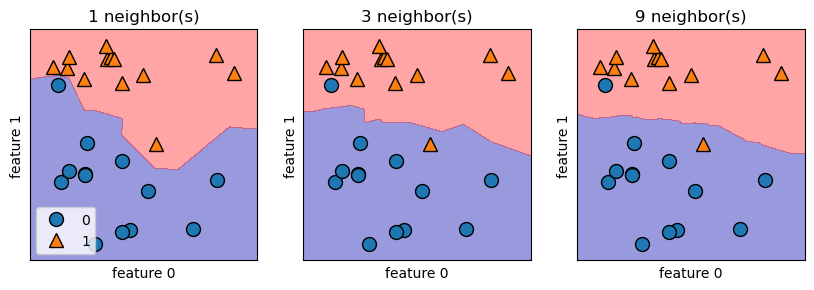

In [20]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    #the fit method return the object self, so we can instantiate
    #and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    print(f"Test set accuracy: {clf.score(X_test, y_test)}")
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax = ax)
    ax.set_title(f"{n_neighbors} neighbor(s)")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

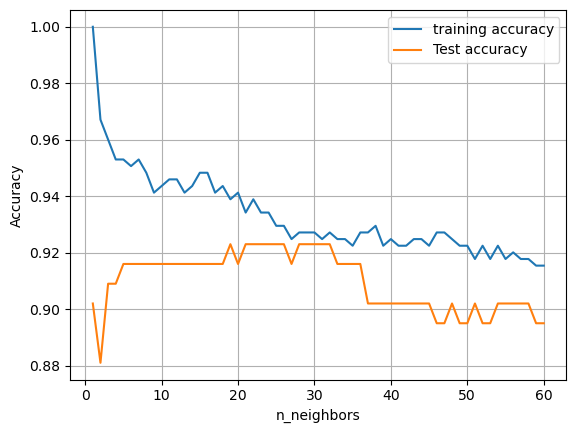

In [21]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=99)

training_accuracy = []
test_accuracy = []
#try n_neihbors form 1 to 10
neighbors_settings = range(1, 61)

for n_neighbors in neighbors_settings:
    #build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    #record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    #record test set accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.grid(True)
plt.show()


### K-neighbours regression

There is also a regression variant of the k-nearest neighbors algorithm. Again, let's start usint the single nrearest neighbors, this time using the wave dataset. We've added three test data points as green stars on the x-axis. The prediction using a single neighbors is just the target value of the nearest neighbor. These are shown as blue stars

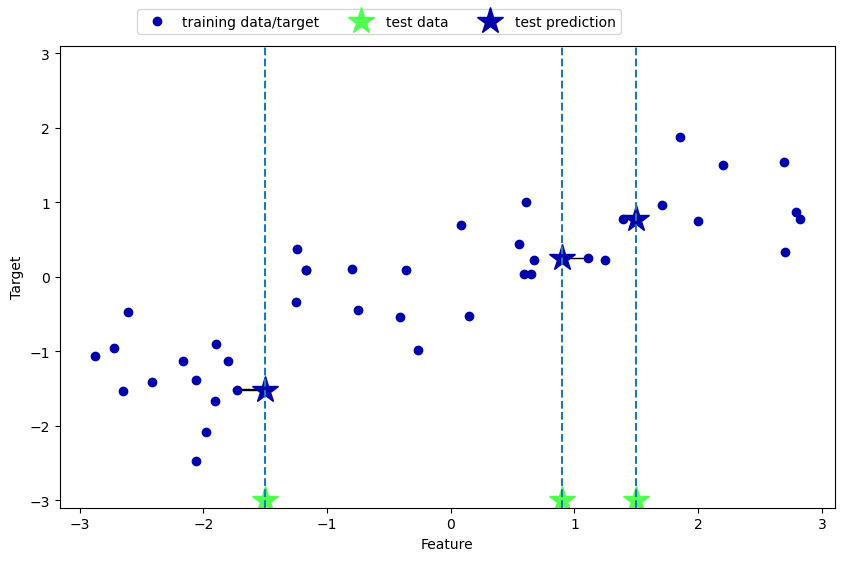

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

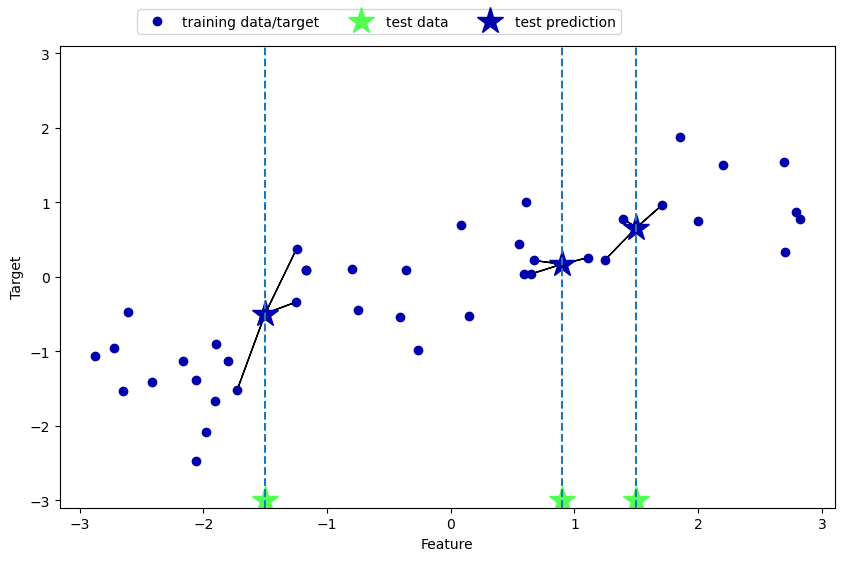

In [23]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [24]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

#split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [25]:
print(f"Test set r^2: {reg.score(X_test, y_test)}")

Test set r^2: 0.8344172446249606


### Analyzing KNN-Regressor

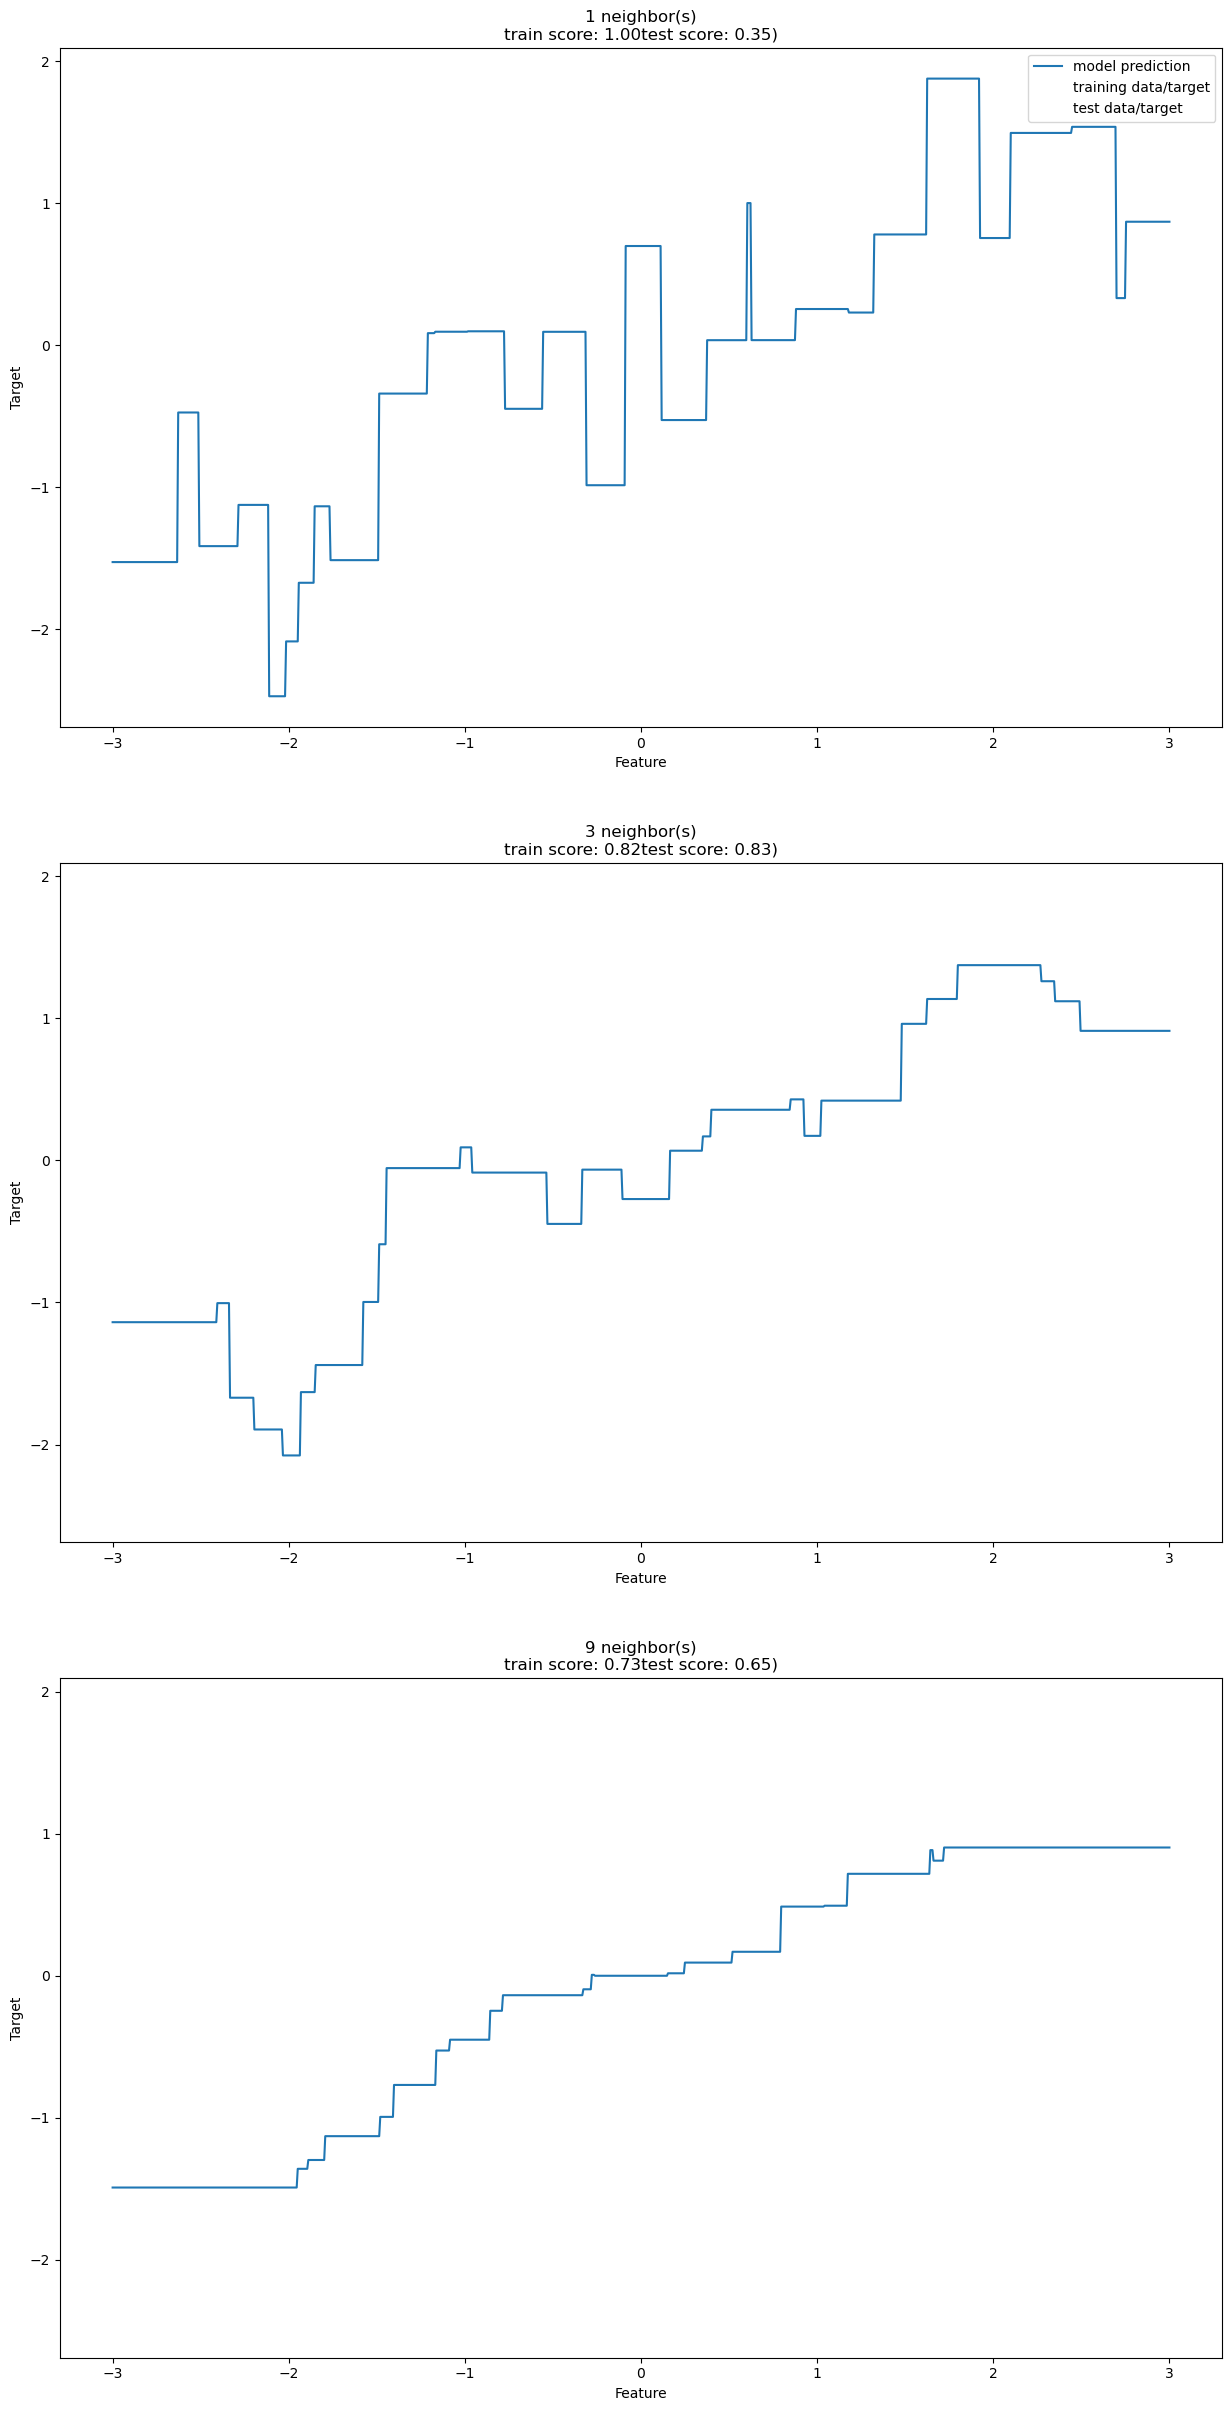

In [26]:
fig, axes = plt.subplots(3, 1, figsize=(15, 30))
# create 1,000 data points, evenly spaced between -3 and 3#create 1,000 data points, evenly spaced between -3, 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    #make predictions using 1,3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=0)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=0)

    ax.set_title(
        f"{n_neighbors} neighbor(s)\n" + 
        f"train score: {reg.score(X_train, y_train):.2f}" +
        f"test score: {reg.score(X_test, y_test):.2f})"
    )
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(['model prediction', 'training data/target',
                'test data/target'], loc='best')

### Strengths, weaknesses and parametes

In principle, there are two important parameters to KNeighbors classifier: the number of neighbors and how you measure distance between data points. In practice, using a small number of neighbors like three or five often works well, but you should certainly adjust this parameter. Choosing the right distance measure is somewhat beyond the scope the book for now. I will go through the maths later on. By default, Eucliden distance used, which works well in many settings.

one of the strengths of k-NN is that the model is very eassy to understand and often ginen resonable performance without a ot of adustments. Using this algorithm is a good 

## <B>Linear Models

### linear models for regression

For regression, the general prediction formula for a linear model looks as follows:<br><br>
<b>ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

Here, x[0] to x[p] denotes the features (in this example, the number of features is p)
of a single data point, w and b are parameters of the model that are learned, and ŷ is
the prediction the model makes. For a dataset with a single feature, this is:

<B>ŷ = w[0] * x[0] + b

Trying to learn the parameters w[0] and b on our one-dimensional wave dataset might lead to the following line:

w[0]: 0.393906  b: -0.031804


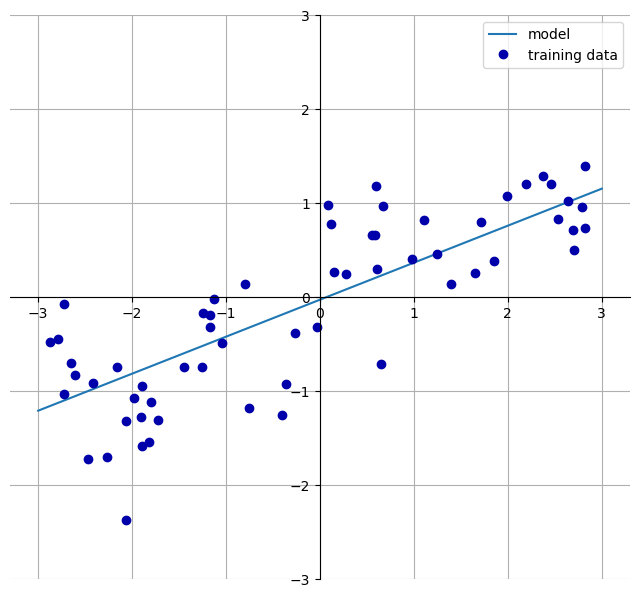

In [27]:
mglearn.plots.plot_linear_regression_wave()

Linear models for regression can be caracterized as regression model for which the prediction is a line for a single feature, a plane when using two features or a hyper-plane in higher dimensions (that is when, using more features).
<Br><br>
I we compare the predictions made by the straight Line with those made by the KNeighborsRegressor, using a stright line to make predicitons. seems very restrictive. It looks like all the final details of the data are lost in a sense, this is true. it is a strong (and somewhat unrealistic) assumption that our target y is a linaer ombination of the features. But look at one-dimentional data gives a somewhat skewed perspective. For dataatests with many features that training data points, any target y can be perfectly modelded (on the training set) as a linear function.
<br><br>
There are many different linear models for regression. The difference between thse models lies how the model parameters w and b are learned from the traing data, and how model complexity can be controlled. We sill now take a look at the most popular linear models for regression.

### Linear regression (aka ordinary least squred)

In [28]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41)

lr = LinearRegression().fit(X_train, y_train)

In [29]:
print(f"lr.cof_: {lr.coef_}")
print(f"lr.intercept_: {lr.intercept_}")

lr.cof_: [0.4548843]
lr.intercept_: -0.06621850388598463


In [30]:
print(f"Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Test set score: {lr.score(X_test, y_test)}")

Training set score: 0.64
Test set score: 0.7408574503203276


In [31]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [32]:
print(f"Training set score: {lr.score(X_train, y_train)}")
print(F"Test set score: {lr.score(X_test, y_test)}")

Training set score: 0.9520519609032729
Test set score: 0.6074721959666306


This discrepancy between performace on the training set and the test set is a clear oveerfitting, and therefore we should try to find a model that allows us to control complexity. One of the most commonly used alternatives to standard linear regression is ridge regression which we will look into next

### Ridge regression

In [33]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print(f"Training set score: {(ridge.score(X_train, y_train)):.2f}")
print(f"Test set score: {ridge.score(X_test, y_test):.2f}")

Training set score: 0.89
Test set score: 0.75


In [34]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(f"Training set score: {ridge10.score(X_train, y_train):.2f}")
print(f"test set score: {ridge10.score(X_test, y_test):.2f}")

Training set score: 0.79
test set score: 0.64


Decreasing alpha allows the coefficients to be less restricted, meaning we move right. for very small values of alpha, coefficients are barely restricted at all, and we end up with a model that resembes LinearRegression:

In [35]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(f"Training set score: {ridge01.score(X_train, y_train):.2f}")
print(f"Test set score: {ridge01.score(X_test, y_test):.2f}")

Training set score: 0.93
Test set score: 0.77


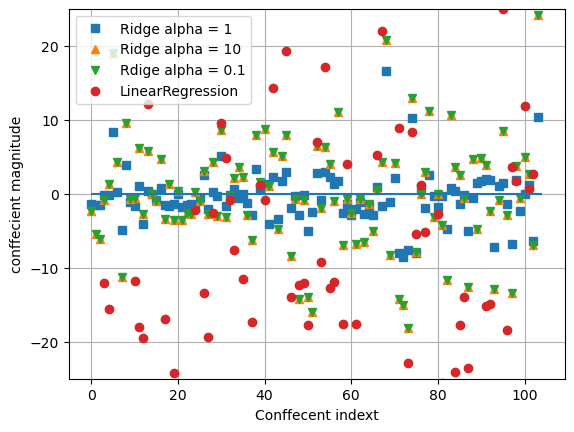

In [36]:
plt.plot(ridge.coef_, 's', label = "Ridge alpha = 1")
plt.plot(ridge01.coef_, '^', label = "Ridge alpha = 10")
plt.plot(ridge01.coef_, 'v', label="Rdige alpha = 0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Conffecent indext")
plt.ylabel("conffecient magnitude")
plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.grid(True)
plt.show()

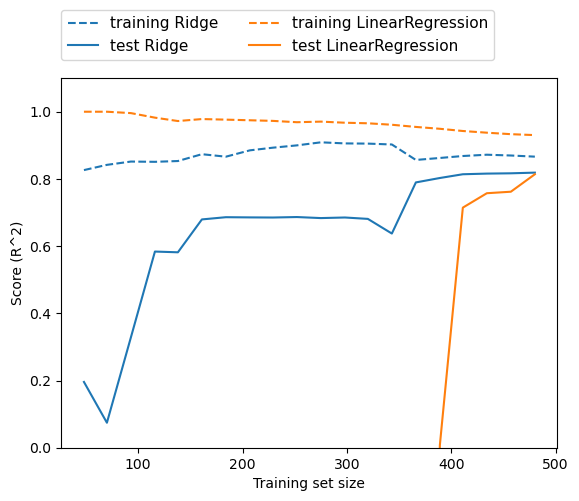

In [37]:
mglearn.plots.plot_ridge_n_samples()

### Lasso

In [38]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(f"Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso.score(X_test, y_test):.2f}")
print("Number of features used: {}".format(np.sum(lasso.coef_!=0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [39]:
# we increase the default setting of "max_iter"
# otherwise the model would warn us that we should increase max_iter
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(f"Training set score: {lasso001.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso001.score(X_test, y_test):.2f}")
print("Number of features used: {}".format(np.sum(lasso001.coef_!=0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


If we set alpha too low, however we again remove the effect of regularization and end up overfitting, with a result similar to LinearRegression

In [40]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
print(f"Training set score: {lasso00001.score(X_train, y_train)}")
print(f"Test set score: {lasso00001.score(X_test, y_test)}")
print(f"Number of features used: {np.sum(lasso00001.coef_!=0)}")

Training set score: 0.9507158754515463
Test set score: 0.6437467421273048
Number of features used: 96


Text(0, 0.5, 'Cofficent Magnitude')

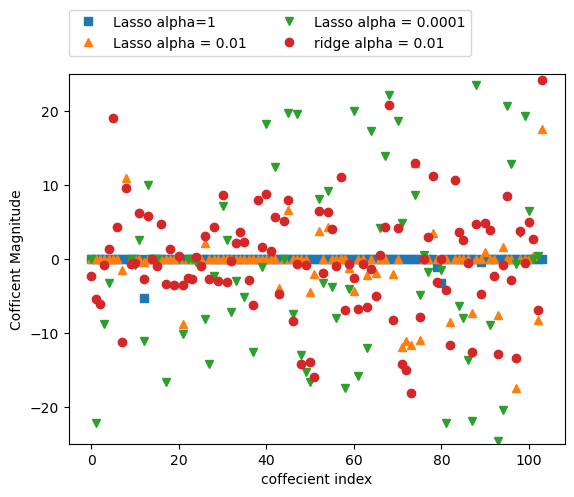

In [41]:
plt.plot(lasso.coef_,'s', label = "Lasso alpha=1")
plt.plot(lasso001.coef_,'^', label = 'Lasso alpha = 0.01')
plt.plot(lasso00001.coef_, 'v', label = "Lasso alpha = 0.0001")

plt.plot(ridge01.coef_, 'o', label="ridge alpha = 0.01")
plt.legend(ncol=2, loc = (0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("coffecient index")
plt.ylabel("Cofficent Magnitude")

### Linear models for classification

#### <B>Logistic Regression and SVC

<B>ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0

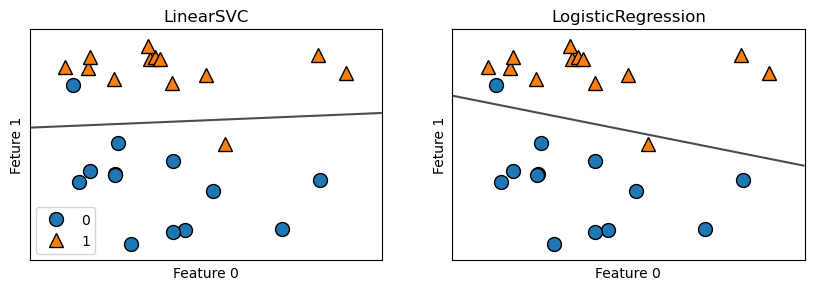

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps = 0.5, ax = ax, alpha = 0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{clf.__class__.__name__}")
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feture 1")
axes[0].legend()


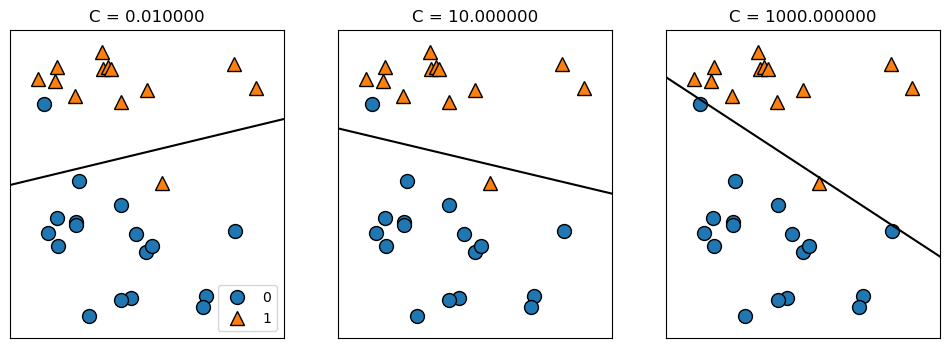

In [43]:
mglearn.plots.plot_linear_svc_regularization()

In [44]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print(f"Training set score: {logreg.score(X_train, y_train):.3f}")
print(f"Test set score: {logreg.score(X_test, y_test):.3f}")


Training set score: 0.948
Test set score: 0.951


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print(f"Training set score: {logreg100.score(X_train, y_train):.3f}")
print(f"Test set score: {logreg100.score(X_test,y_test):.3f}")

Training set score: 0.953
Test set score: 0.965


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print(f"Training set score: {logreg001.score(X_train, y_train):.3f}")
print(f"Test set score: {logreg001.score(X_test,y_test):.3f}")

Training set score: 0.934
Test set score: 0.930


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


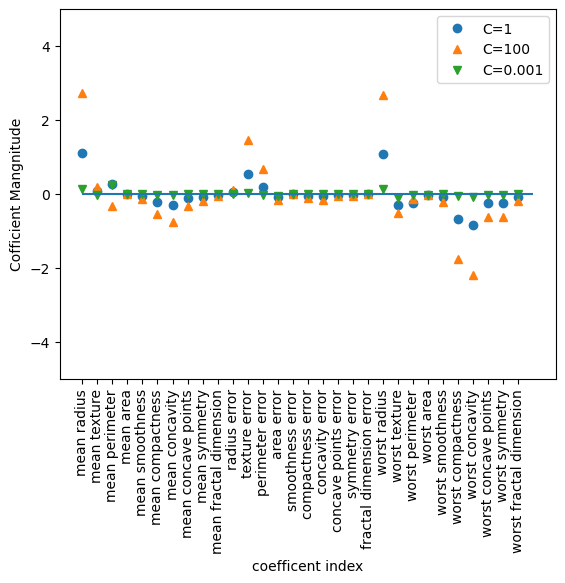

In [47]:
plt.plot(logreg.coef_.T, 'o', label = "C=1")
plt.plot(logreg100.coef_.T, '^', label = "C=100")
plt.plot(logreg001.coef_.T, 'v', label = "C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("coefficent index")
plt.ylabel("Cofficient Mangnitude")
plt.legend()

If we desire a more interpretable model, using L1 reguarization migth help, as it limits the model to using only a few features. Here is the coefficient plot and classification accuracies for L1 regularization:

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


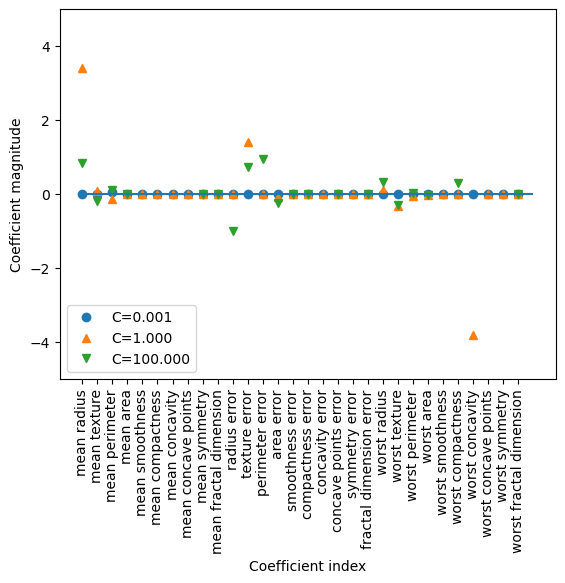

In [48]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

### Linear models for multiclass classification

<B>w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

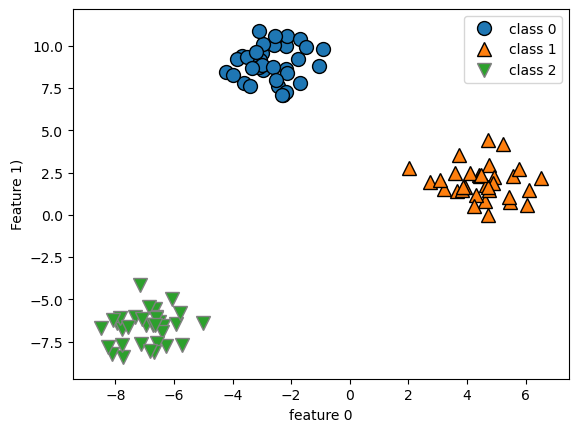

In [49]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.xlabel("feature 0")
plt.ylabel("Feature 1)")
plt.legend(["class 0", "class 1", "class 2"])

In [50]:
linear_svm = LinearSVC().fit(X,y)
print("Coefficent shape: ", linear_svm.coef_.shape)
print("intercept shape: ", linear_svm.intercept_.shape)

Coefficent shape:  (3, 2)
intercept shape:  (3,)


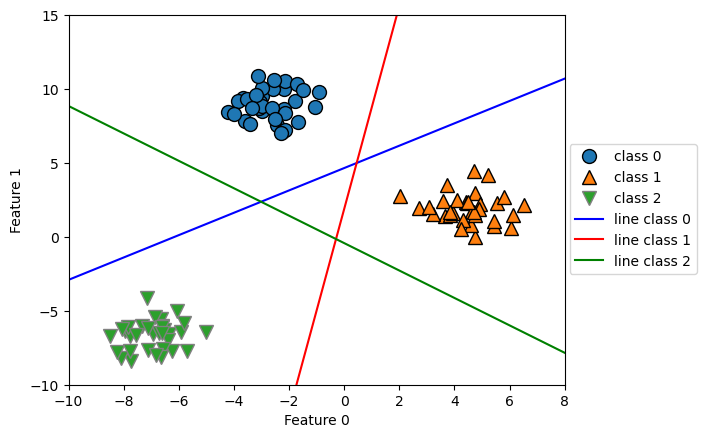

In [51]:
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, 
                                  ['b', 'r', 'g']):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['class 0', 'class 1', 'class 2', 'line class 0', 'line class 1', 'line class 2'], loc=(1.01,0.3))
plt.show()

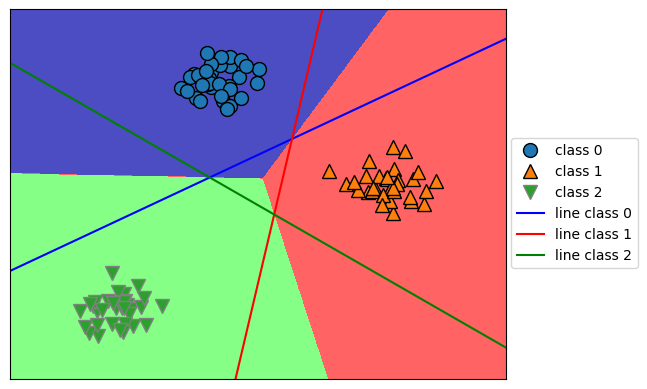

In [52]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c = color)
plt.legend(['class 0', 'class 1', 'class 2', 'line class 0', 'line class 1', 'line class 2'], loc=(1.01, 0.3))


### Strength, weakness and parameters

The main parameter of linear models is the regularization perameter, called alpha in the regression models and C in linear SVC and logisticRegression. Large vales for alpha or small values for C mean simple models. In particular for the regression models, tuning these parameters is quite important. Usually C and alpha are serched for on a logarithmic scale. The orther decision you have to make is weather you want to use L1 regularization or L2 regularization. If you assume that only a few of you features are actually important, you shoould use L1. Otherwise, you should default to L2. L1 can also be usefull if interpretability of the model is imporrtant. As L1 will use only a few features, it a easier to explain which features are important to model, and what the effects of these features are.

Linear Models are very fast to train and aslo fast to predict. They scale to very large datasets and work well with spare data. If your data consists of hundreds of thousands or millions of samples, you might want to investigate using the solver='sag' option in LogisticRegressiono and ridge, which can be faster than the default large datasets. Other options are the SGDClassifer class and the SgdRegressor class, which implement evern more scalable versions of the linear models decribed here.

Another strength of linear models is that they make it relatively easy to understand you a prediction is made, using the formulas we say earlier for regression and classification. Unfortunately, it is often not etirely clear why coefficents are the way tey are. This is particularly true if you dataset has highly correlated features; in these cases, the coefficients might be hard to interpret.

Linear models often perform well when the number of teatures is larege compared to the number of samples. They are often used on very large datastes. simply because it's not feasible to train other models. However, in lower-dimensional spaces, other models might yeild better generalization performance. We will look at some examples in thich linear models fail in "Kernalized Support Vector Machines" later

### Method chaining

The fit method of all scikit-learn models return self. This allows you to write code like the following. which we've already used extensively in this chapter:

In [53]:
#instantiate model and fit in the one line
logreg = LogisticRegression().fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Here, we used the return value of fit (which is self) to assign the trained model to the variable logreg. This concatenation of method calls (here __init__ and then fit) is known as method chaining. Another common applicaton of method chaining in scikit-learn is to fit and predict in one line:

In [54]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Finally, we can even do model instantiation, fitting and prediction in one line:

In [55]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Finally: 
<table border="1" cellspacing="0" cellpadding="8" style="border-collapse: collapse; width: 100%; font-family: Arial, sans-serif;">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th>🔍 Feature / Criteria</th>
      <th>📊 Logistic Regression</th>
      <th>📍 K-Nearest Neighbors (KNN)</th>
      <th>⚙️ Support Vector Classifier (SVC)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>💡 Intuition</td>
      <td>Linear decision boundary</td>
      <td>Classifies based on closest points</td>
      <td>Maximizes margin between classes</td>
    </tr>
    <tr>
      <td>🧠 Train time</td>
      <td>Fast</td>
      <td>None (lazy learning)</td>
      <td>Medium to slow (depends on kernel)</td>
    </tr>
    <tr>
      <td>🚀 Predict time</td>
      <td>Very fast</td>
      <td>Very slow on large data</td>
      <td>Medium</td>
    </tr>
    <tr>
      <td>🔍 Interpretability</td>
      <td>✅ Very High (weights = importance)</td>
      <td>❌ None</td>
      <td>❌ Black-box</td>
    </tr>
    <tr>
      <td>🔗 Linearity</td>
      <td>Works best for linear problems</td>
      <td>Works well for nonlinear data</td>
      <td>Can model both (kernel trick)</td>
    </tr>
    <tr>
      <td>⚖️ Bias-Variance</td>
      <td>High bias, low variance</td>
      <td>Low bias, high variance</td>
      <td>Balanced (depends on hyperparams)</td>
    </tr>
    <tr>
      <td>🧱 Scalability</td>
      <td>✅ Scales to millions easily</td>
      <td>❌ Slow with big data</td>
      <td>❌ Not great with huge datasets</td>
    </tr>
    <tr>
      <td>🔁 Works with small data?</td>
      <td>✅ Very well</td>
      <td>✅ Yes</td>
      <td>✅ Yes</td>
    </tr>
    <tr>
      <td>💥 Noise sensitivity</td>
      <td>Medium</td>
      <td>❌ High (noisy points hurt)</td>
      <td>✅ Robust with regularization</td>
    </tr>
    <tr>
      <td>🎯 Best for</td>
      <td>Probabilistic output, simple logic</td>
      <td>Simple pattern matching</td>
      <td>Complex decision boundaries</td>
    </tr>
  </tbody>
</table>


## <B>Navie Bayes Classifiers

Naive Bayes classifiers are a family of classifiers that are quite simmilar to linear models discussed in the previous section. However, they tend to be even faster in training, The price paid for this efficiency is that naive Bayes models often provide generaliztion performance that is slightly worse than that of linear classifiers like LogisticRegression and Linear SVC

The reaon that naive Boyes models are so efficent is that they learn parameters by looking at each features individually and collect simple per-class statistics from eatch feature. There are three kind of naive Bayes Classifiers implemented in scikit-learn: <B> GaussianNB, BernulliNB, and MultinomialNB</b>. GaussianNB can be applied to any continuous data, while BernoulliNB assumes binary data and MultinomalNB assumes count data (that is, that each feature represents an integer count of some-thing. like how often a word appers in a sentence). BernoulliNB and MultinomialNB are mostly used in text data classification. 

The BernoulliNB classifier counts how often every feature of each class is not zero. This is most easily understood with an example:

In [56]:
X = np.array([[0, 1, 0, 1],
[1, 0, 1, 1],
[0, 0, 0, 1],
[1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

Here we have four data points, with four binary features each. There are two classes, 0, 1. For class 0(the first and third data points) the first feature is zero two times and nonzero zero times the seacond feature is zero one time and nonzero one time, and so on. These same counts are then calculated for the data points in the second class. Counting the nonzero entries per class in essense looks like this:

In [57]:
counts = {}
for label in np.unique(y):
    #iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y==label].sum(axis=0)
print(f"Feature counts:\n{counts}")

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


The other two naive Bayes models, MultinomialNB and Gaussian NB, are slightly different in what kinds of statisc they compute. Mutli nomialNb takes into account the average value of each feature for each class, while GaussianNB stores the average vaolue as well as the standard deviation of each feature for each calss. To make a prediction, a data point is compared to the statics for each of the classes and the best matching class is predicted. Interestingly, for both MultinomialNB and BernoulliNB, this leads to a prediction formula that is of the same form as in the linear models. Unfortunately, coef_ for the naive Bayes modes has a somewhat different meaning than in the linear models, in the coef_ is ont the same as w.

### Strength, Weakness, and parameters

MultinomialNB and BernoulliNB have a single parameter, alpha, which controls model complexity. That way alpha works is that the algorithm adds to the data alpha nany virtual data points that have positive values for all the features. This reslults in "smoothing" of the statistics. A large alpha means more smoothing, results in less complex models. The algorithm's performance is relatively robust to the setting of alpha, meaning that setting alpha is not critcal for good performance. However, tuning it usually improves accuracy shomewhat.

GaussianNB is mostly used on very high-dimensionalData, while the other two varieants of naive Bayes are widely used for sparse count data such as text. MultinomialNB usually performs better than BinaryNB, particularly on datasets with a relatively large number of nonzero features.

The naive Bayes models share many of the strengths and weaknesses of the niear models. They are very fast to train and to predict, and the training procedure is easy to understand. The models work very well with high-dimensional sparse data and are relatively robust to the parameters. Naive Bayes models are greate baseline models and are often used on very large datasets, where training evern a linear model might take too long.

## Decision Trees

Decision trees are widely used models for calssification and regression tasks. Essentially they learn a hierarchy of if/else questions, leading to a decision.<Br><br>
These question are similar to the questions you might ask in a game of 20 quesitons. Imagine you want to distinguish between the following four animals: brear, hawks, penguine and dolphines. Your goal is to get to the right answer by asking as few if/else question that narrows down you possible animals to just  two. if the answer is "yes", you can ask another question that could help you distinguish between hawks and penguins. For example, you could ask whether the animal can fly. If the animal doesn't have fethers, your possible animal choices are dolphines and bears, and you will need to ask a question to distinguish between these two animals--for example, asking weather the animal has fins.

In [58]:
!brew install graphviz


==> Downloading https://formulae.brew.sh/api/formula.jws.json
==> Downloading https://formulae.brew.sh/api/cask.jws.json
To reinstall 13.0.1, run:
  brew reinstall graphviz


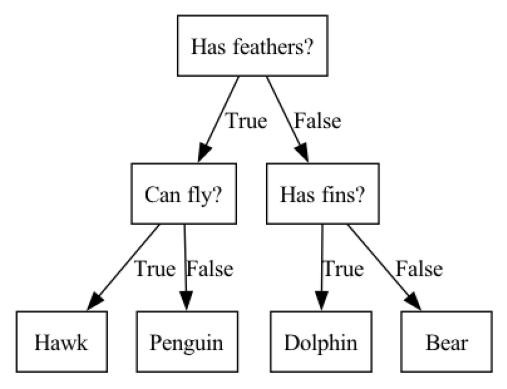

In [59]:
mglearn.plots.plot_animal_tree()

In this illustration, each node in the tree either represents a question or a terminal node (also called a leaf) that contains the answer. The edges connect the answers to a question with the next   question you would ask.
<Br>
In machine learning parlance, we built a model to distinguish between four classes of
animals (hawks, penguins, dolphins, and bears) using the three features “has feathers,”
“can fly,” and “has fins.” Instead of building these models by hand, we can learn
them from data using supervised learning.

### Building decision Trees

Let's go through the process of building a decision treee for the 2D classicication data-set. The dataset consist of two half-moon shapes, with eatch class consisting of 75 data points. We will refer to this dataset as two_moons.

Learning a decion tree means learning a sequence of if/else questions that gets us to the true answer most quickly. In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalize our mode is). Usually data does not come with the form of binary yes/no features as in the animeal example, but is instead represnted as continuous features such as in the 2D dataset. The test that are used on continuous data are of the form <b>"is feature <i>i</i> larger than value a?"</b>

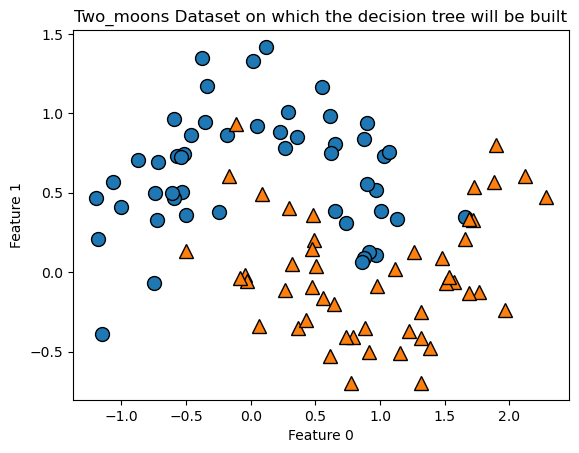

In [60]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import mglearn

# Generate the dataset
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

# Plot using mglearn's discrete scatter
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# Axis labels (optional)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Two_moons Dataset on which the decision tree will be built")
plt.show()


To build a tree a algorithm searches over all possible tests and finds the one that is most informative about the target variable. The below picture shows the first test that is picked. Splitting the dataset vefrtically at x[1] = 0.0596 yeids the most information; it best separates the points in class 1 from the points in class 2. The top node, also called the root, represents the whole dataset, consisting of 75 points belonging to class 0 and 75 points belongs to class 1. The split is done by testing wheater x[1] <= 0.596, indecated by a black line. If the test is true, a point is assigned to the left node, which contains w points belonging to class 0 and 32 points belonging to class 1. Otherwise the points is assigned to the right node, which contains 48 points belonging to class 0 and 18 points belonging to class 1. These two nodes correspond to the top and bottom regions shown in picture. Even though the first split did a good jonb of separating the two classes the two classes, the bottom region still contains points belong to class 0, and the top region still contains points belongs to class 1. We can build a more accurate model by repating the process of looking for the best test in both regions.

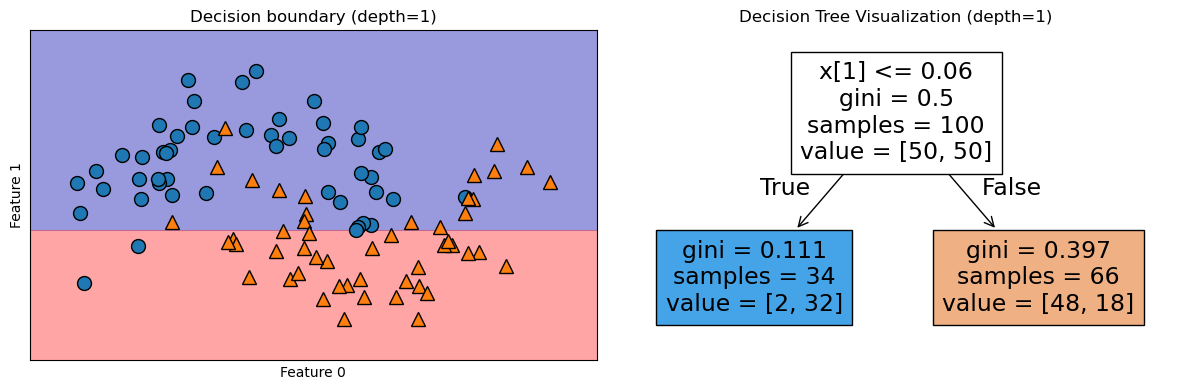

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import mglearn

# Generate the moon dataset
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

# Fit a decision tree classifier with max_depth=1
clf = DecisionTreeClassifier(max_depth=1, random_state=42)
clf.fit(X, y)

# Plot the decision boundary
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the 2D decision surface
mglearn.plots.plot_2d_separator(clf, X, fill=True, ax=axes[0], alpha=0.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[0])
axes[0].set_title("Decision boundary (depth=1)")
axes[0].set_xlabel("Feature 0")
axes[0].set_ylabel("Feature 1")

# Plot the tree using scikit-learn's plot_tree
tree.plot_tree(clf, ax=axes[1], filled=True)
axes[1].set_title("Decision Tree Visualization (depth=1)")

plt.tight_layout()
plt.show()


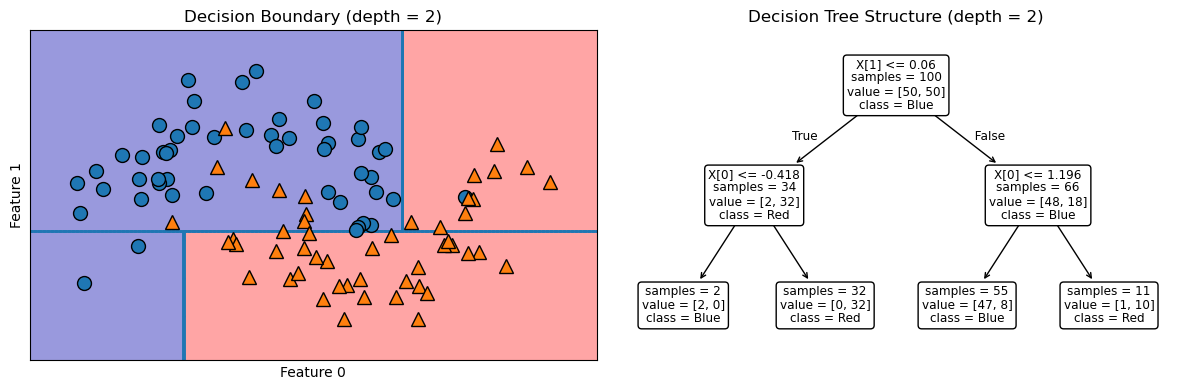

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier, plot_tree
import mglearn

# Step 1: Generate the make_moons dataset
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

# Step 2: Fit a decision tree of depth 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Step 3: Set up 1x2 subplot for left (boundary) and right (tree)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# LEFT: Plot crisp decision regions using mglearn's tree partition visual
mglearn.plots.plot_tree_partition(X, y, clf, ax=axes[0])
axes[0].set_title("Decision Boundary (depth = 2)")
axes[0].set_xlabel("Feature 0")
axes[0].set_ylabel("Feature 1")

# RIGHT: Show actual decision tree diagram
plot_tree(clf, ax=axes[1],
          filled=False,  # remove color shading inside boxes
          impurity=False,  # hide impurity (Gini/entropy)
          rounded=True,
          feature_names=["X[0]", "X[1]"],
          class_names=["Blue", "Red"])

axes[1].set_title("Decision Tree Structure (depth = 2)")

plt.tight_layout()
plt.show()


The recursive process yields a binary tree of decisions, with each node containing a test. Alternatively, we can think of eatch test as splitting the part of the data that is currently being considered along one axis. This yelds a view of the algorithm as building a hierarchical along one axis. This yields a view of the algoritm as building a hierarchical partition. As each test concerns only a single feature, the reginons in the resulting partition always have axis-parallel boundaries.

The recursive partisioning of the data is repeated until each region in the partiion (each leaf in the decision tree) only contains a single target value (a single class or a sigle regression value). A leaf of the tree that contains data points that all share the same target value is called pure. The final partitioning for this dataset is shown in the next picture.

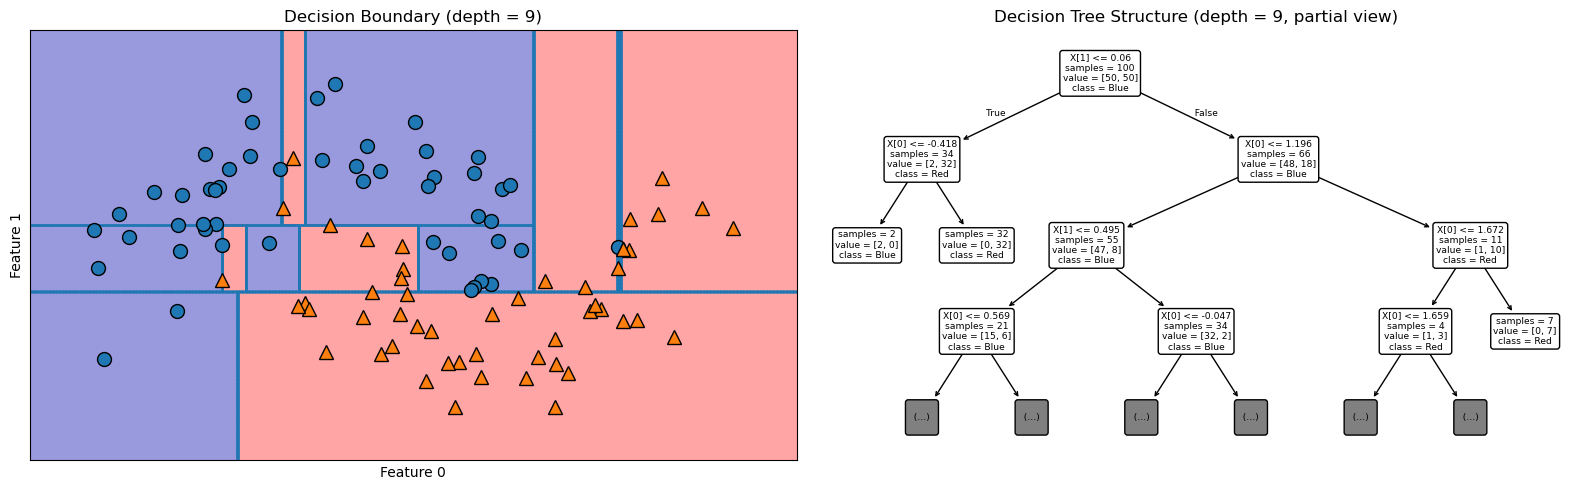

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier, plot_tree
import mglearn

# Step 1: Generate the moon dataset
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

# Step 2: Fit a decision tree with depth = 9
clf = DecisionTreeClassifier(max_depth=9, random_state=42)
clf.fit(X, y)

# Step 3: Create subplot for boundary and tree side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# LEFT: Show the tree-based partitioning (sharp-edged boundary)
mglearn.plots.plot_tree_partition(X, y, clf, ax=axes[0])
axes[0].set_title("Decision Boundary (depth = 9)")
axes[0].set_xlabel("Feature 0")
axes[0].set_ylabel("Feature 1")

# RIGHT: Tree structure visualization
plot_tree(clf,
          ax=axes[1],
          filled=False,
          impurity=False,
          rounded=True,
          max_depth=3,  # truncate after 3 levels just like the book (with ellipses ...)
          feature_names=["X[0]", "X[1]"],
          class_names=["Blue", "Red"])

axes[1].set_title("Decision Tree Structure (depth = 9, partial view)")

plt.tight_layout()
plt.show()


A prediction on a new data point is made by checking which region of the partision of the feature space the point lies in, and then predicting the majority target (or the single target in the case of pure leaves) in that region. The region can be found by traversing the tree from the root and going left or right, depending on wether the test is fulfilled or not.

It is also possible to use trees for regression tasks. using examctly the same technique. To make a prediction, we traverse the tree based on the tests in each mode and find the leaf the new data point falls into. The output for this data point is the mean target of the traing points in this leaf.

### Controlling complexity of decision trees

Typically, building a tree as described here and continuing until all leaves are pure
leads to models that are very complex and highly overfit to the training data. The
presence of pure leaves mean that a tree is 100% accurate on the training set; each
data point in the training set is in a leaf that has the correct majority class. The overfitting
can be seen on the left of above picture. You can see the regions determined to
belong to class 1 in the middle of all the points belonging to class 0. On the other
hand, there is a small strip predicted as class 0 around the point belonging to class 0
to the very right. This is not how one would imagine the decision boundary to look,
and the decision boundary focuses a lot on single outlier points that are far away
from the other points in that class.

There are two common strategies to prevent overfitting: stopping the creation of the
tree early (also called pre-pruning), or building the tree but then removing or collapsing
nodes that contain little information (also called post-pruning or just pruning).
Possible criteria for pre-pruning include limiting the maximum depth of the tree,
limiting the maximum number of leaves, or requiring a minimum number of points in a node to keep splitting it.

Decision trees in scikit-learn are implemented in the DecisionTreeRegressor and
DecisionTreeClassifier classes. scikit-learn only implements pre-pruning, not
post-pruning.

Let’s look at the effect of pre-pruning in more detail on the Breast Cancer dataset. As
always, we import the dataset and split it into a training and a test part. Then we build
a model using the default setting of fully developing the tree (growing the tree until
all leaves are pure). We fix the random_state in the tree, which is used for tiebreaking
internally:

In [64]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                        stratify=cancer.target, random_state= 42)
tree = DecisionTreeClassifier().fit(X_train, y_train)
print(f"Training set score: {tree.score(X_train, y_train)}")
print(f"Test set score: {tree.score(X_test, y_test)}")


Training set score: 1.0
Test set score: 0.916083916083916


As expected, the accuracy on the training set is 100%—because the leaves are pure,
the tree was grown deep enough that it could perfectly memorize all the labels on the
training data. The test set accuracy is slightly worse than for the linear models we
looked at previously, which had around 95% accuracy.

If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep
and complex. Unpruned trees are therefore prone to overfitting and not generalizing
well to new data. Now let’s apply pre-pruning to the tree, which will stop developing
the tree before we perfectly fit to the training data. One option is to stop building the
tree after a certain depth has been reached. Here we set max_depth=4, meaning only
four consecutive questions can be asked (cf. Figures 2-24 and 2-26). Limiting the
depth of the tree decreases overfitting. This leads to a lower accuracy on the training
set, but an improvement on the test set:

In [65]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print(f"train score: {tree.score(X_train, y_train):.3f}")
print(f"Test score: {tree.score(X_test, y_test):.3f}")

train score: 0.988
Test score: 0.951


### Analyzing decision trees

We can visualize the tree using the export_graphviz function from the tree module.
This writes a file in the .dot file format, which is a text file format for storing graphs.
We set an option to color the nodes to reflect the majority class in each

In [66]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = "tree.dot", class_names=['malignant', 'benign'],
                 feature_names=cancer.feature_names, impurity = False, filled = True)

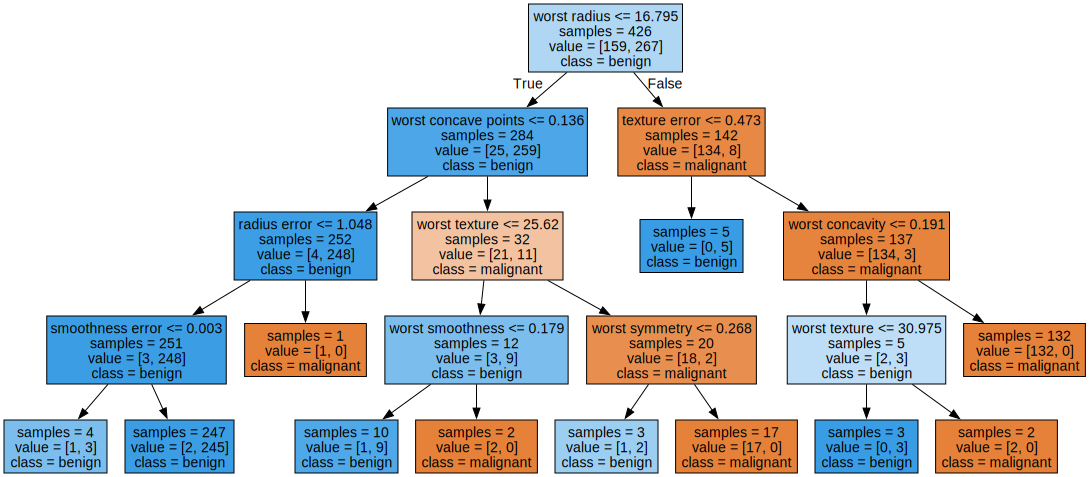

In [67]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

The visualization of the tree provides a great in-depth view of how the algorithm
makes predictions, and is a good example of a machine learning algorithm that is
easily explained to nonexperts. However, even with a tree of depth four, as seen here,
the tree can become a bit overwhelming. Deeper trees (a depth of 10 is not uncommon)
are even harder to grasp. One method of inspecting the tree that may be helpful
is to find out which path most of the data actually takes. The n_samples shown in
each node in the picture gives the number of samples in that node, while value provides
the number of samples per class. Following the branches to the right, we see
that worst radius <= 16.795 creates a node that contains only 8 benign but 134
malignant samples. The rest of this side of the tree then uses some finer distinctions
to split off these 8 remaining benign samples. Of the 142 samples that went to the
right in the initial split, nearly all of them (132) end up in the leaf to the very right.

Taking a left at the root, for worst radius > 16.795 we end up with 25 malignant
and 259 benign samples. Nearly all of the benign samples end up in the second leaf from the right with most of the other leaves containing very few samples.

### Feature importance in trees

Instead of looking at the whole tree, which can be taxing, there are some useful properties
that we can derive to summarize the workings of the tree. The most commonly
used summary is <i>feature importance</i>, which rates how important each feature is for
the decision a tree makes. It is a number between 0 and 1 for each feature, where 0
means “not used at all” and 1 means “perfectly predicts the target.” The feature
importances always sum to 1:

In [68]:
print(F"Feature importance:\n{tree.feature_importances_}")

Feature importance:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


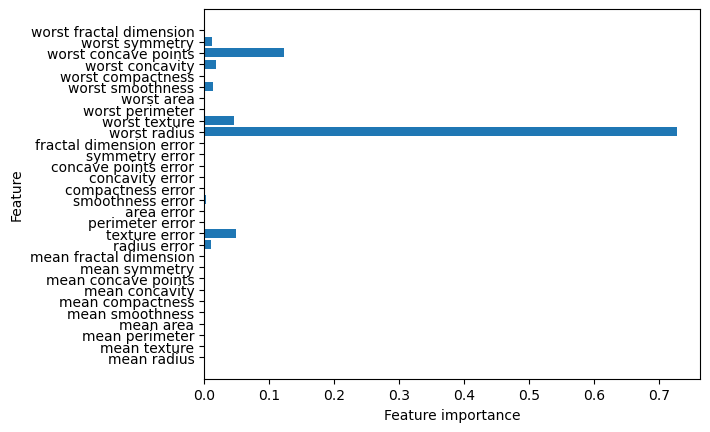

In [69]:
def plot_feature_importantces_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importantces_cancer(tree)

Here we see that the feature used in the top split (“worst radius”) is by far the most
important feature. This confirms our observation in analyzing the tree that the first
level already separates the two classes fairly well.
However, if a feature has a low feature_importance, it doesn’t mean that this feature
is uninformative. It only means that the feature was not picked by the tree, likely
because another feature encodes the same information.
In contrast to the coefficients in linear models, feature importances are always positive,
and don’t encode which class a feature is indicative of. The feature importances
tell us that “worst radius” is important, but not whether a high radius is indicative of a
sample being benign or malignant. In fact, there might not be such a simple relationship
between features and class, as you can see in the following example:

Feature importances: [0. 1.]


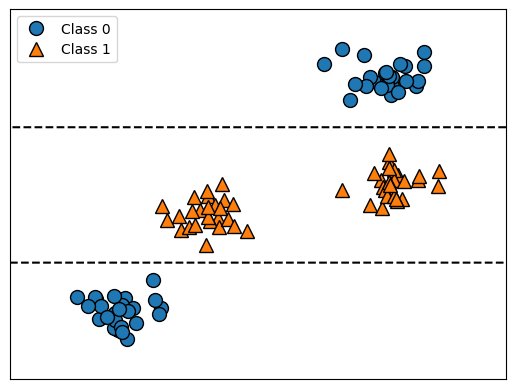

In [70]:
tree = mglearn.plots.plot_tree_not_monotone()

While we focused our discussion here on decision trees for classification, all that was
said is similarly true for decision trees for regression, as implemented in Decision
TreeRegressor. The usage and analysis of regression trees is very similar to that of
classification trees. There is one particular property of using tree-based models for
regression that we want to point out, though. The DecisionTreeRegressor (and all
other tree-based regression models) is not able to extrapolate, or make predictions
outside of the range of the training data.

Text(0, 0.5, 'Price in $/Mbyte')

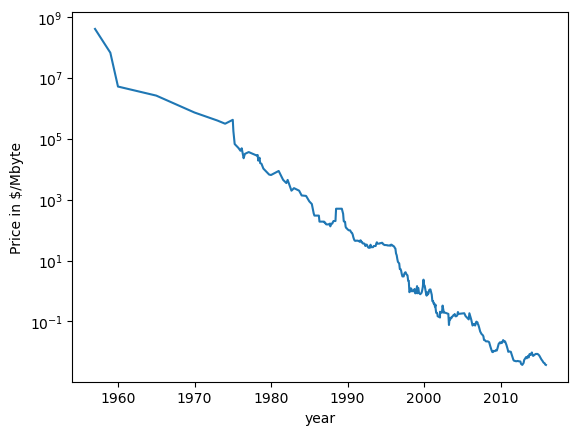

In [71]:
import pandas as pd
ram_prices = pd.read_csv("https://raw.githubusercontent.com/amueller/mglearn/refs/heads/main/data/ram_price.csv")

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("year")
plt.ylabel("Price in $/Mbyte")

In [72]:
ram_prices.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


Note the logarithmic scale of the y-axis. When plotting logarithmically, the relation
seems to be quite linear and so should be relatively easy to predict, apart from some
bumps.
We will make a forecast for the years after 2000 using the historical data up to that
point, with the date as our only feature. We will compare two simple models: a
DecisionTreeRegressor and LinearRegression. We rescale the prices using a logarithm,
so that the relationship is relatively linear. This doesn’t make a difference for
the DecisionTreeRegressor, but it makes a big difference for LinearRegression (we
will discuss this in more depth). After training the models and making
predictions, we apply the exponential map to undo the logarithm transform. We
make predictions on the whole dataset for visualization purposes here, but for a
quantitative evaluation we would only consider the test dataset:

In [73]:
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
# predict prices based on date
X_train = data_train[['date']].to_numpy()
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
# predict on all data
X_all = ram_prices[['date']].to_numpy()
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

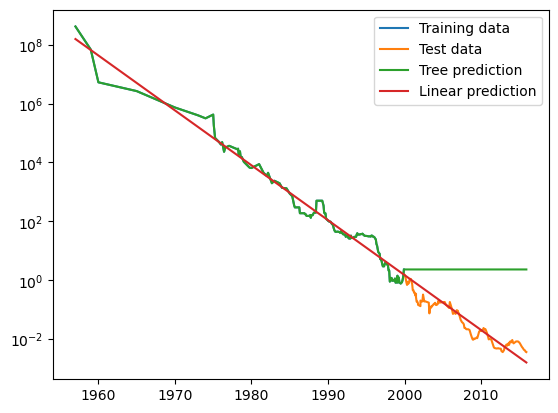

In [74]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

The difference between the models is quite striking. The linear model approximates
the data with a line, as we knew it would. This line provides quite a good forecast for
the test data (the years after 2000), while glossing over some of the finer variations in
both the training and the test data. The tree model, on the other hand, makes perfect
predictions on the training data; we did not restrict the complexity of the tree, so it
learned the whole dataset by heart. However, once we leave the data range for which
the model has data, the model simply keeps predicting the last known point. The tree
has no ability to generate “new” responses, outside of what was seen in the training
data. This shortcoming applies to all models based on trees